In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Import do DS e Entendimento dos Dados

In [2]:
dados=pd.read_csv(r'C:\Users\breno\OneDrive\Área de Trabalho\Cursos e Estudos\Estudos\Regression_CarPrice\CarPrice_Assignment.csv')

In [3]:
dados.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dados.drop(columns='car_ID',inplace=True)

In [5]:
dados.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# 2. Análise das variáveis e suas relações

Text(0.5, 0, 'Preços')

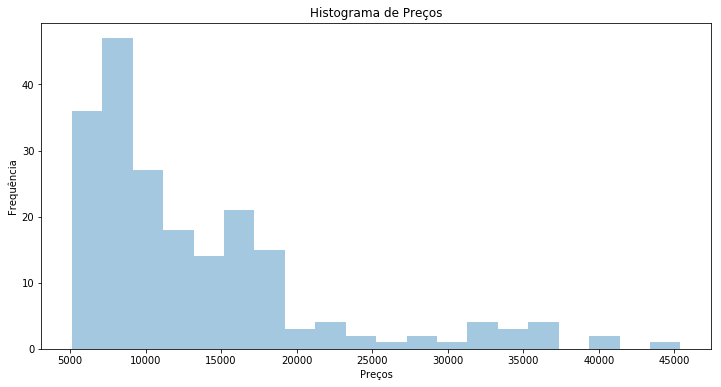

In [6]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.distplot(dados.price,norm_hist=False,kde=False,bins=20)
ax.set_title('Histograma de Preços')
ax.set_ylabel('Frequência')
ax.set_xlabel('Preços')

Text(0.5, 0, 'Preços')

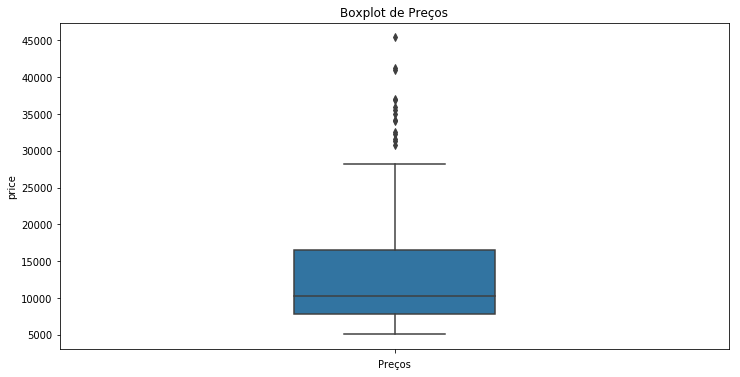

In [7]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.boxplot(dados.price,width=0.3,orient='v')
ax.set_title('Boxplot de Preços')
ax.set_xlabel('Preços')

<B> Vemos que temos muitos outliers para essa distribuição. Não iremos considerar por enquanto os outliers

In [8]:
#Query para retirar os outliers para otimização do modelo
dados_outliers=dados.query('price < 30000')

Text(0.5, 0, 'Preços')

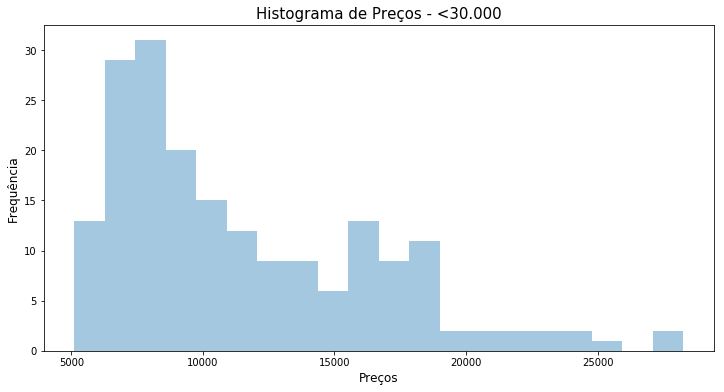

In [9]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.distplot(dados_outliers.price,norm_hist=False,kde=False,bins=20)
ax.set_title('Histograma de Preços - <30.000',fontsize=15)
ax.set_ylabel('Frequência',fontsize=12)
ax.set_xlabel('Preços',fontsize=12)

Text(0.5, 0, 'Preços')

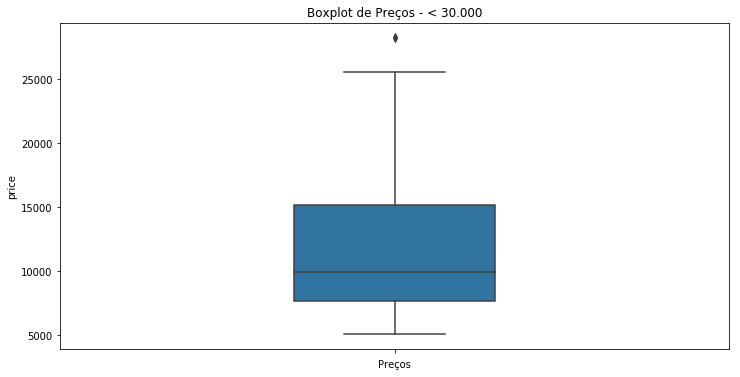

In [10]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.boxplot(dados_outliers.price,width=0.3,orient='v')
ax.set_title('Boxplot de Preços - < 30.000')
ax.set_xlabel('Preços')

Text(0.5, 0, 'Preços')

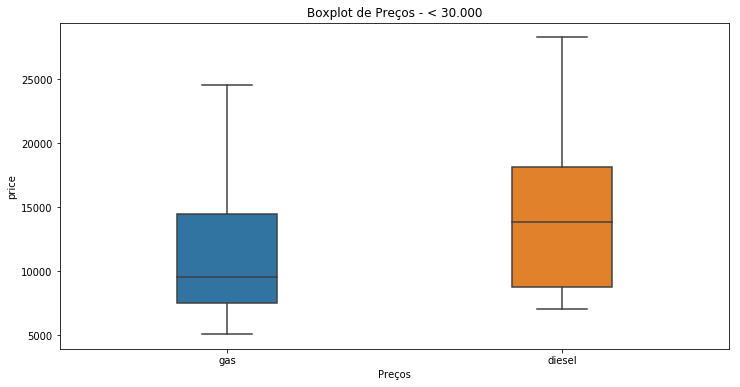

In [11]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.boxplot(y=dados_outliers.price,x=dados_outliers.fueltype,width=0.3,orient='v')
ax.set_title('Boxplot de Preços - < 30.000')
ax.set_xlabel('Preços')

In [12]:
dados_object = dados_outliers.select_dtypes(include='object')
dados_numerical = dados_outliers.select_dtypes(exclude='object')

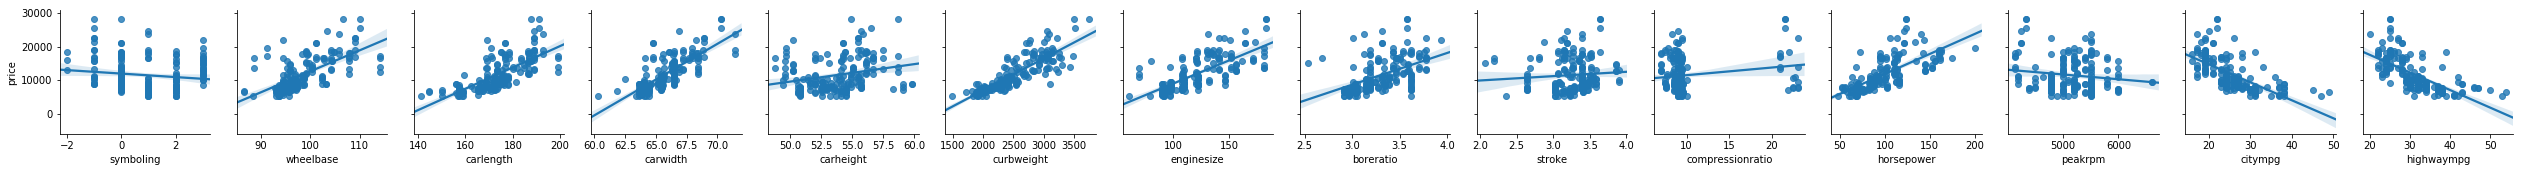

In [13]:
sns.pairplot(dados_numerical,kind='reg',y_vars=['price'],x_vars=['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg'])

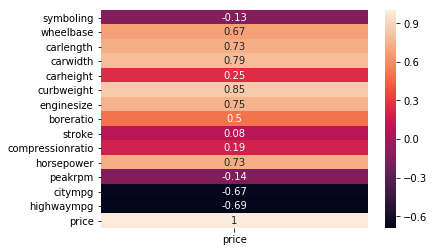

In [14]:
sns.heatmap(dados_numerical.corr().round(2)[['price']],annot=True)

In [15]:
dados_object.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [16]:
print(dados.fueltype.unique())
print(dados.aspiration.unique())
print(dados.doornumber.unique())
print(dados.carbody.unique())
print(dados.drivewheel.unique())
print(dados.enginelocation.unique())
print(dados.enginetype.unique())
print(dados.cylindernumber.unique())
print(dados.fuelsystem.unique())

['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


<B> Alguns dados podem ser substituidos por numeros e as análises das variáveis numéricas pode ter alterações

In [17]:
numbers_dict = {
    'two':2,
    'three':3,
    'four':4,
    'five':5,
    'six':6,
    'eight':8,
    'twelve':12
}

In [18]:
dados_outliers['doornumber']=dados_outliers['doornumber'].map(numbers_dict)

c:\Users\breno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
dados_outliers['cylindernumber']=dados_outliers['cylindernumber'].map(numbers_dict)

c:\Users\breno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
dados_numerical_2 = dados_outliers.select_dtypes(exclude='object')

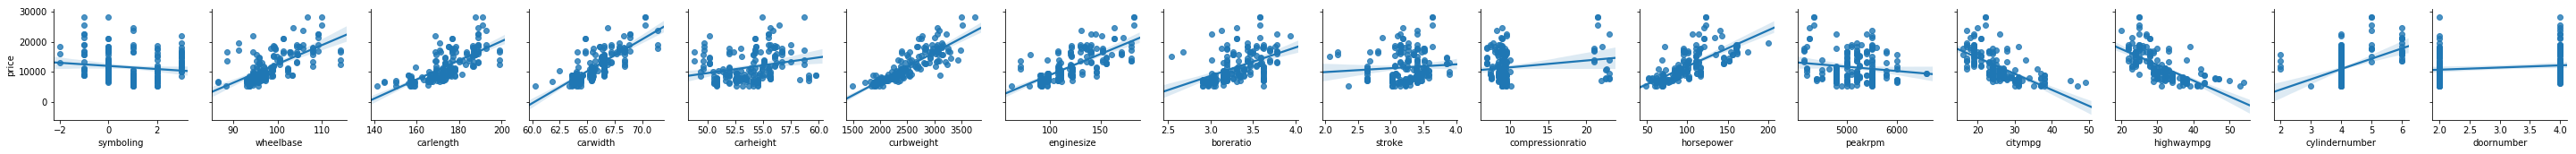

In [21]:
sns.pairplot(dados_numerical_2,kind='reg',y_vars=['price'],x_vars=['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'cylindernumber',
 'doornumber'])

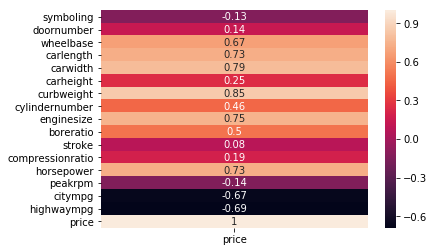

In [22]:
sns.heatmap(dados_numerical_2.corr().round(2)[['price']],annot=True)

Text(0, 0.5, 'Preços')

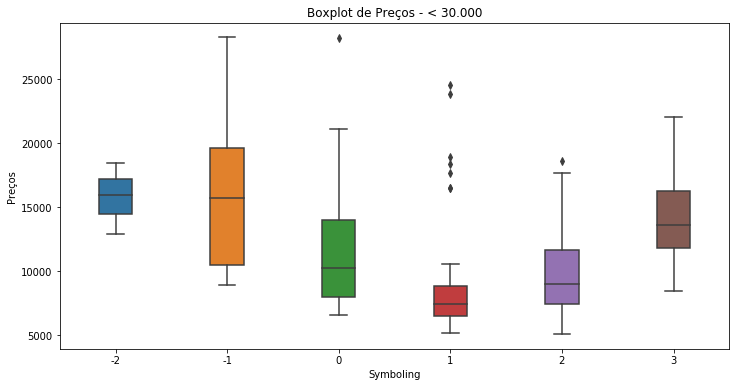

In [23]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.boxplot(y=dados_numerical_2.price,x=dados_numerical_2.symboling,width=0.3,orient='v')
ax.set_title('Boxplot de Preços - < 30.000')
ax.set_xlabel('Symboling')
ax.set_ylabel('Preços')

<b> A variável symboling tem diferenças entre sí para os preços ?

Text(0, 0.5, 'Preços')

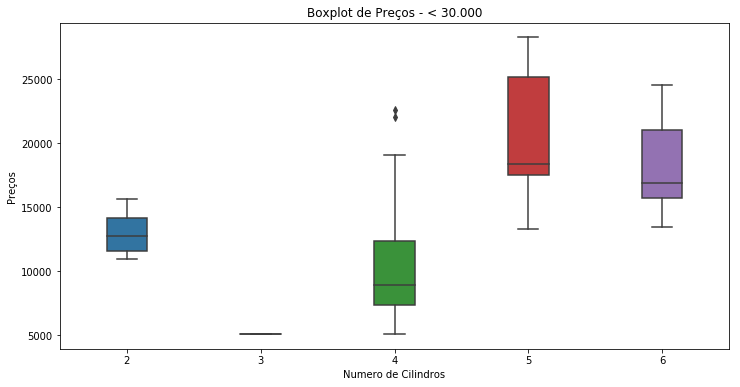

In [24]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.boxplot(y=dados_numerical_2.price,x=dados_numerical_2.cylindernumber,width=0.3,orient='v')
ax.set_title('Boxplot de Preços - < 30.000')
ax.set_xlabel('Numero de Cilindros')
ax.set_ylabel('Preços')

<b> existe diferença entre a quantidade de cilíndros ?

In [25]:
dados_numerical_2['compressionratio_bins']= dados_numerical_2['compressionratio'].apply(lambda x:0 if x<=15 else 1 )

c:\Users\breno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Preços')

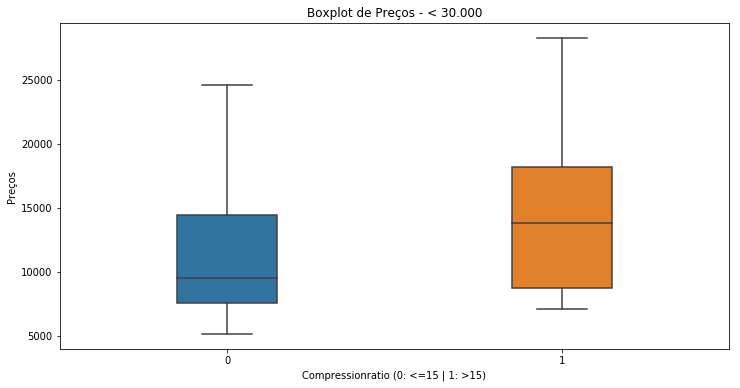

In [26]:
ax,fig=plt.subplots(figsize=(12,6))
ax=sns.boxplot(y=dados_numerical_2.price,x=dados_numerical_2.compressionratio_bins,width=0.3,orient='v')
ax.set_title('Boxplot de Preços - < 30.000')
ax.set_xlabel('Compressionratio (0: <=15 | 1: >15)')
ax.set_ylabel('Preços')

<b> Existem diferenças entre os compressionratios ?

In [27]:
dados_object_2 = dados_outliers.select_dtypes(include='object')

In [28]:
dados_object_2['price']=dados_numerical_2['price']

c:\Users\breno\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
dados_object_2.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,price
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,13495.0
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,16500.0
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi,16500.0
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,13950.0
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,17450.0


Text(0.5, 0, '')

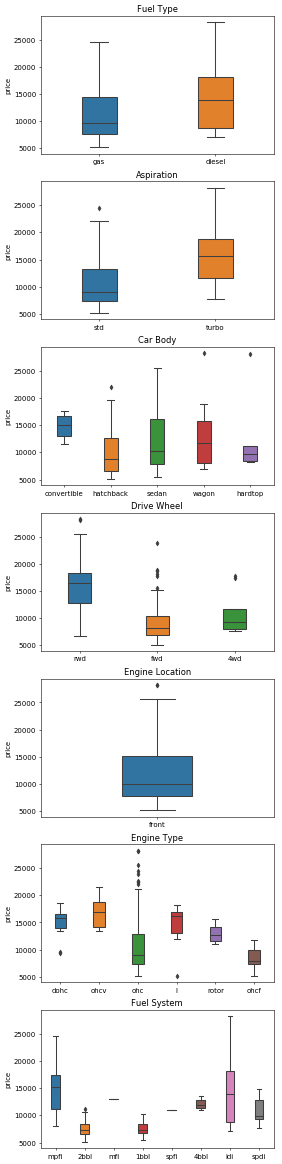

In [30]:
fig,axs = plt.subplots(7,figsize=(6,30),dpi=50)

axs[0]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.fueltype,width=0.3,orient='v',ax=axs[0])
axs[0].set_title('Fuel Type')
axs[0].set_xlabel('')

axs[1]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.aspiration,width=0.3,orient='v',ax=axs[1])
axs[1].set_title('Aspiration')
axs[1].set_xlabel('')

axs[2]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.carbody,width=0.3,orient='v',ax=axs[2])
axs[2].set_title('Car Body')
axs[2].set_xlabel('')

axs[3]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.drivewheel,width=0.3,orient='v',ax=axs[3])
axs[3].set_title('Drive Wheel')
axs[3].set_xlabel('')

axs[4]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.enginelocation,width=0.3,orient='v',ax=axs[4])
axs[4].set_title('Engine Location')
axs[4].set_xlabel('')

axs[5]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.enginetype,width=0.3,orient='v',ax=axs[5])
axs[5].set_title('Engine Type')
axs[5].set_xlabel('')

axs[6]=sns.boxplot(y=dados_object_2.price,x=dados_object_2.fuelsystem,width=0.3,orient='v',ax=axs[6])
axs[6].set_title('Fuel System')
axs[6].set_xlabel('')

Text(0.5, 0, '')

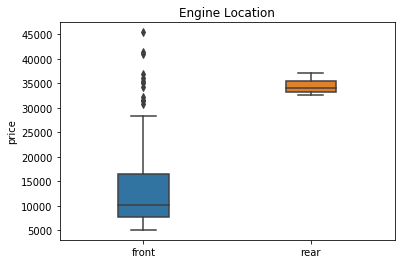

In [31]:
ax=sns.boxplot(y=dados.price,x=dados.enginelocation,width=0.3,orient='v')
ax.set_title('Engine Location')
ax.set_xlabel('')

In [32]:
dados_object_2.fuelsystem.value_counts()

mpfi    80
2bbl    66
idi     19
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

<B> Fuel Type, Aspirantion, Car Body:</b> Conferir se há diferença <br />
<B>Drive Wheel, Engine Type :</b> Tem muitos outliers. Conferir se há diferença, se houver, testar modelo sem e com <br />
<b>Engine Location: </b> Considerar apenas para quando for feita a análise com outliers <br />
<B> Fuel System: </b> Alguns tipos possuem poucos dados, vale a pena manter ?

# 3. Analises Estatisticas e Testes de Hipótese (Desconsiderando outliers)

<b> Testes a serem considerados: </b> <br/> <br/>
<b> VARIÁVEIS NUMÉRICAS </B> <BR/><br/>
<b>cylindernumber:</b> Conferir se há diferença entre eles <br/>
<b>compressionratio_bins:</b> Conferir se há diferença entre eles <br/> <br/>
<b> VARIÁVEIS CATEGORICAS </B> <BR/> <BR/>
<B> Fuel Type, Aspirantion, Car Body:</b> Conferir se há diferença <br />
<B>Drive Wheel, Engine Type :</b> Tem muitos outliers. Conferir se há diferença, se houver, testar modelo sem e com <br />
<b>Engine Location: </b> Considerar apenas para quando for feita a análise com outliers <br />
<B> Fuel System: </b> Alguns tipos possuem poucos dados, vale a pena manter ?

In [33]:
#DataFrames
#dados_outliers
#dados_object_2
#dados_numerical_2

In [34]:
from scipy.stats import normaltest

In [35]:
normaltest(dados_outliers.price)

NormaltestResult(statistic=27.23132568647702, pvalue=1.2212167706681285e-06)

Não são dados normais, será utilizado o ranksums()

In [36]:
from scipy.stats import ranksums

alternative{‘two-sided’, ‘less’, ‘greater’}, optional
Defines the alternative hypothesis. Default is ‘two-sided’. The following options are available:

‘two-sided’: one of the distributions (underlying x or y) is stochastically greater than the other.

‘less’: the distribution underlying x is stochastically less than the distribution underlying y.

‘greater’: the distribution underlying x is stochastically greater than the distribution underlying y.

## 3.1. Variáveis Numéricas

### 3.1.1 Cylinder Number

In [37]:
from scipy.stats import ranksums

In [42]:
dados_numerical_2.cylindernumber.unique()

array([4, 6, 5, 3, 2], dtype=int64)

In [44]:
cylinder_2 = dados_numerical_2.query('cylindernumber==2').price
cylinder_3 = dados_numerical_2.query('cylindernumber==3').price
cylinder_4 = dados_numerical_2.query('cylindernumber==4').price
cylinder_5 = dados_numerical_2.query('cylindernumber==5').price
cylinder_6 = dados_numerical_2.query('cylindernumber==6').price

In [114]:
dict_hipoteses = {
    2:cylinder_2,
    3:cylinder_3,
    4:cylinder_4,
    5:cylinder_5,
    6:cylinder_6
}

In [112]:
list_hipoteses = list()
list_response = list()
for i in range(2,7,1):
    for j in range(2,7,1):
        _,p = ranksums(dict_hipoteses[i],dict_hipoteses[j])
        list_hipoteses.append(round(p,3))
    list_response.append(list_hipoteses[:])
    list_hipoteses.clear()
df_hipoteses=pd.DataFrame(list_response)
df_hipoteses.columns = range(2,7,1)
df_hipoteses.index=range(2,7,1)
df_hipoteses.head()

,2,3,4,5,6
2,1.000,0.157,0.072,0.016,0.011
3,0.157,1.000,0.089,0.114,0.102
4,0.072,0.089,1.000,0.000,0.000
5,0.016,0.114,0.000,1.000,0.225
6,0.011,0.102,0.000,0.225,1.000
